#importing libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

#1. Load the dataset into python environment

In [21]:
dataset=pd.read_csv('titanic_dataset.csv')

In [22]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#2. Make ‘PassengerId’ as the index column

In [23]:
dataframe=dataset.copy()

In [24]:
dataframe.index=dataframe['PassengerId']
dataframe.drop(columns='PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


#3. Check the basic details of the dataset

In [26]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [25]:
dataframe.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

there are null values in column: 'Age', cabin and Embarked

#4. Fill in all the missing values present in all the columns in the dataset

In [30]:
dataframe['Age']=dataframe['Age'].fillna(dataframe['Age'].mean())
dataframe['Cabin']=dataframe['Cabin'].fillna('C1234')


In [34]:
dataframe['Embarked'].mode()

0    S
dtype: object

In [35]:
dataframe['Embarked']=dataframe['Embarked'].fillna('S')

In [36]:
dataframe.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#5. Check and handle outliers in at least 3 columns in the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


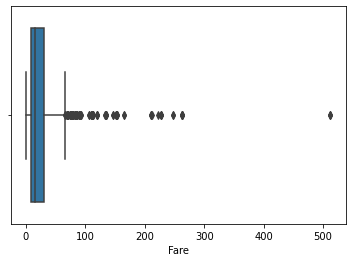

In [39]:
sns.boxplot(dataframe['Fare'])

In [52]:
def find_outliers(series):
    Q1 = np.percentile(series, 25, interpolation = 'midpoint')
    Q2 = np.percentile(series, 50, interpolation = 'midpoint')
    Q3 = np.percentile(series, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5*IQR
    up_lim = Q3 + 1.5*IQR
    print(f'Upper limit = {up_lim} and Lower limit = {low_lim}')
    outlier_list = []
    for x in series:
        if((x>up_lim) or (x<low_lim)):
            outlier_list.append(x)
            print(f'Outliers for {series.name} = {outlier_list}')
            return outlier_list

In [53]:
fare_outliers = find_outliers(dataframe['Fare'])
fare_outliers

Upper limit = 65.6344 and Lower limit = -26.724
Outliers for Fare = [71.2833]


[71.2833]

In [54]:
fare_h=dataframe['Fare']>65.6344
f_h=dataframe.loc[fare_h].index
f_h

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [55]:
fare_l=dataframe['Fare']<-26.724
f_l=dataframe.loc[fare_l].index
f_l

Int64Index([], dtype='int64', name='PassengerId')

In [56]:
dataframe.drop(f_h,inplace=True)

##Visualization after eleminate the ouliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


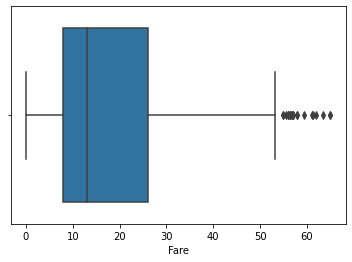

In [57]:
sns.boxplot(dataframe['Fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


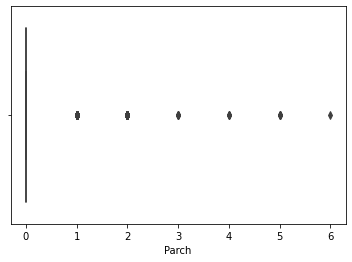

In [40]:
sns.boxplot(dataframe['Parch'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


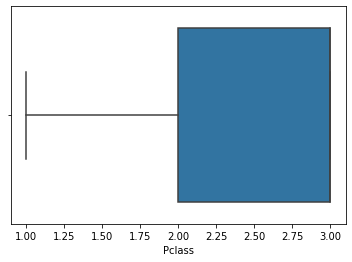

In [41]:
sns.boxplot(dataframe['Pclass'])

#6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [59]:
dataframe=dataframe.drop(columns='PassengerId')

In [60]:
dataframe

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C1234,S
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C1234,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,C1234,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,C1234,Q
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,C1234,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,C1234,S


In [62]:
y=dataframe['Survived']

In [70]:
x=dataframe.drop(['Survived'],axis=1)

In [71]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.000000,1,0,7.2500,S
3,3,female,26.000000,0,0,7.9250,S
4,1,female,35.000000,1,0,53.1000,S
5,3,male,35.000000,0,0,8.0500,S
6,3,male,29.699118,0,0,8.4583,Q
...,...,...,...,...,...,...,...
887,2,male,27.000000,0,0,13.0000,S
888,1,female,19.000000,0,0,30.0000,S
889,3,female,29.699118,1,2,23.4500,S


In [73]:
x.reset_index(drop=True, inplace=True)

In [76]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,775.00000,775.000000,775.000000,775.000000,775.000000
mean,2.48000,29.103880,0.437419,0.340645,17.822091
std,0.73439,12.779988,0.899838,0.785914,13.578085
min,1.00000,0.420000,0.000000,0.000000,0.000000
25%,2.00000,22.000000,0.000000,0.000000,7.895800
50%,3.00000,29.699118,0.000000,0.000000,13.000000
75%,3.00000,34.000000,1.000000,0.000000,26.000000
max,3.00000,80.000000,5.000000,6.000000,65.000000


In [77]:
encoder=LabelEncoder()

In [78]:
x['Sex']=encoder.fit_transform(x['Sex'])

In [81]:
x['Embarked']=encoder.fit_transform(x['Embarked'])

In [82]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,3,0,26.000000,0,0,7.9250,2
2,1,0,35.000000,1,0,53.1000,2
3,3,1,35.000000,0,0,8.0500,2
4,3,1,29.699118,0,0,8.4583,1
...,...,...,...,...,...,...,...
770,2,1,27.000000,0,0,13.0000,2
771,1,0,19.000000,0,0,30.0000,2
772,3,0,29.699118,1,2,23.4500,2
773,1,1,26.000000,0,0,30.0000,0


In [84]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6
0,1.0,1.0,0.271174,0.2,0.000000,0.111538,1.0
1,1.0,0.0,0.321438,0.0,0.000000,0.121923,1.0
2,0.0,0.0,0.434531,0.2,0.000000,0.816923,1.0
3,1.0,1.0,0.434531,0.0,0.000000,0.123846,1.0
4,1.0,1.0,0.367921,0.0,0.000000,0.130128,0.5
...,...,...,...,...,...,...,...
770,0.5,1.0,0.334004,0.0,0.000000,0.200000,1.0
771,0.0,0.0,0.233476,0.0,0.000000,0.461538,1.0
772,1.0,0.0,0.367921,0.2,0.333333,0.360769,1.0
773,0.0,1.0,0.321438,0.0,0.000000,0.461538,0.0
